In [22]:
import folium
import os
from folium.plugins import HeatMap
from folium import plugins
import pandas as pd
import seaborn as sb
import matplotlib as plt
import matplotlib.pyplot
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [23]:
df = pd.read_csv('latrocinio.csv', delimiter = ';', encoding = 'iso-8859-1')

In [24]:
df.describe()

,ANO_BO,NUM_BO,NUMERO,RG,IDADE,CORCUTIS,ANO_FABRICACAO,ANO_MODELO,QUANT_CELULAR,MARCA_CELULAR
count,79.0,79.000000,79.000000,5.900000e+01,59.000000,0.0,79.000000,79.000000,0.0,0.0
mean,2019.0,265.113924,635.392405,1.924274e+07,51.728814,NaN,839.607595,839.974684,NaN,NaN
std,0.0,230.067381,1023.393693,1.446565e+07,14.362104,NaN,997.627499,998.063574,NaN,NaN
min,2019.0,2.000000,0.000000,1.885747e+06,20.000000,NaN,0.000000,0.000000,NaN,NaN
25%,2019.0,45.000000,0.500000,3.585039e+06,40.000000,NaN,0.000000,0.000000,NaN,NaN
50%,2019.0,244.000000,340.000000,1.751385e+07,53.000000,NaN,0.000000,0.000000,NaN,NaN
75%,2019.0,434.000000,944.000000,3.519137e+07,60.000000,NaN,2010.000000,2011.000000,NaN,NaN
max,2019.0,939.000000,7810.000000,5.393460e+07,88.000000,NaN,2018.000000,2019.000000,NaN,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 54 columns):
ANO_BO                      79 non-null int64
NUM_BO                      79 non-null int64
NUMERO_BOLETIM              79 non-null object
BO_INICIADO                 79 non-null object
BO_EMITIDO                  79 non-null object
DATAOCORRENCIA              79 non-null object
PERIDOOCORRENCIA            79 non-null object
DATACOMUNICACAO             79 non-null object
DATAELABORACAO              79 non-null object
BO_AUTORIA                  79 non-null object
FLAGRANTE                   79 non-null object
NUMERO_BOLETIM_PRINCIPAL    45 non-null object
LOGRADOURO                  59 non-null object
NUMERO                      79 non-null int64
BAIRRO                      59 non-null object
CIDADE                      59 non-null object
UF                          59 non-null object
LATITUDE                    59 non-null object
LONGITUDE                   59 non-null object
DESCRIC

In [26]:
df.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,NOMEPESSOA,TIPOPESSOA,VITIMAFATAL,RG,RG_UF,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2019,2,fev/19,04/01/2019 18:21,04/01/2019 18:40,13/10/2018,A NOITE,04/01/2019,04/01/2019 18:21,Desconhecida,Não,519/2018 - 130001,NaN,0,NaN,NaN,NaN,NaN,NaN,Residência,NaN,BO PARA ADENDO,DEL.INV.GER. S.JOSE DOS CAMPOS,04º D.P. S.JOSE DOS CAMPOS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - TRANSEUNTE,§3o. Se da violência resulta morte:,Consumado,JOAO BATISTA LOPES,Vítima,Sim,13926358.0,SP,CARRANCAS-MG,BRASILEIRA,Masculino,02/08/1955,63.0,Casado,ARMADOR(A),NaN,NaN,Roubo (art. 157),Vítima,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
1,2019,4,abr/19,04/01/2019 22:47,05/01/2019 03:01,04/01/2019,A NOITE,04/01/2019,04/01/2019 22:47,Desconhecida,Não,103/2019 - 10108,NaN,0,NaN,NaN,NaN,NaN,NaN,Residência,IC-IML,BO PARA INQUÉRITO,DHPP DIV. HOMICIDIOS,12º D.P. PARI,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - RESIDENCIA,§3o. Se da violência resulta morte:,Consumado,VÍTIMA 1 - DESCONHECIDO,Vítima,Sim,NaN,NaN,NaN,NaN,Masculino,NaN,NaN,NaN,NaN,NaN,NaN,Roubo (art. 157),Vítima,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
2,2019,16,16/2019,06/01/2019 01:26,06/01/2019 03:53,05/01/2019,A TARDE,06/01/2019,06/01/2019 01:26,Desconhecida,Não,NaN,ESTRADA DO SERTÃOZINHO DA CATIOCA,1,AREA RURAL,CUNHA,SP,"-23,1656399","-44,83909611",Unidade rural,IC-IML,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.CUNHA,DEL.POL.CUNHA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - RESIDENCIA,§3o. Se da violência resulta morte:,Consumado,DIRCEU VAZ LEITE,Vítima,Sim,12861589.0,SP,CUNHA -SP,BRASILEIRA,Masculino,14/12/1957,61.0,Solteiro,LAVRADOR(A),NaN,NaN,Roubo (art. 157),Vítima,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
3,2019,16,16/2019,06/01/2019 01:26,06/01/2019 03:53,05/01/2019,A TARDE,06/01/2019,06/01/2019 01:26,Desconhecida,Não,NaN,ESTRADA DO SERTÃOZINHO DA CATIOCA,1,AREA RURAL,CUNHA,SP,"-23,1656399","-44,83909611",Unidade rural,IC-IML,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.CUNHA,DEL.POL.CUNHA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - TRANSEUNTE,NaN,Consumado,DIRCEU VAZ LEITE,Vítima,Sim,12861589.0,SP,CUNHA -SP,BRASILEIRA,Masculino,14/12/1957,61.0,Solteiro,LAVRADOR(A),NaN,NaN,Roubo (art. 157),Vítima,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
4,2019,16,16/2019,06/01/2019 01:26,06/01/2019 03:53,05/01/2019,A TARDE,06/01/2019,06/01/2019 01:26,Desconhecida,Não,NaN,ESTRADA DO SERTÃOZINHO DA CATIOCA,1,AREA RURAL,CUNHA,SP,"-23,1656399","-44,83909611",Unidade rural,IC-IML,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.CUNHA,DEL.POL.CUNHA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - TRANSEUNTE,NaN,Tentado,DIRCEU VAZ LEITE,Vítima,Sim,12861589.0,SP,CUNHA -SP,BRASILEIRA,Masculino,14/12/1957,61.0,Solteiro,LAVRADOR(A),NaN,NaN,Roubo (art. 157),Vítima,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN


In [27]:
df.sample(10)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,NOMEPESSOA,TIPOPESSOA,VITIMAFATAL,RG,RG_UF,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
42,2019,566,566/2019,23/01/2019 00:14,23/01/2019 04:43,22/01/2019,A NOITE,23/01/2019,23/01/2019 00:14,Desconhecida,Não,NaN,RUA GALILEU EMENDABILI,134,SANTA TEREZINHA,S.BERNARDO DO CAMPO,SP,"-23,72022254","-46,53592718",Via pública,IC-IML,APRECIAÇÃO DO DELEGADO TITULAR,01º D.P. S.B.C-DR OMAR CASSIM,06º D.P. S.BERNARDO DO CAMPO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - TRANSEUNTE,NaN,Tentado,LUCAS PINHEIRO DA SILVA,Vítima,Sim,49661963.0,SP,S.CAETANO DO SUL -SP,BRASILEIRA,Masculino,13/11/1996,22.0,Solteiro,OPERADOR(A) TELEMARKETING,2 Grau completo,NaN,Roubo (art. 157),Vítima,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
65,2019,939,939/2019,27/01/2019 21:22,27/01/2019 22:46,27/01/2019,A NOITE,27/01/2019,27/01/2019 21:22,Desconhecida,Não,283/2019 - 70928,RUA ITAPICURU,349,CHACARA STO ANTONIO,CAMPINAS,SP,"-22,92241508","-47,01338927",Via pública,IC,BO PARA ADENDO,PLANTÃO - 01 DP CAMPINAS,10º D.P. CAMPINAS,Localização e/ou Devolução,Localização/Apreensão de veículo,NaN,Consumado,MAURILIO FRANCISCO MATIAS,Vítima,Sim,1885747.0,PR,UMUARMA-PR,NaN,Masculino,20/08/1959,59.0,Divorciado,FUNILEIRO(A),NaN,NaN,Localização/Apreensão de veículo,Vítima,FFG5198,SP,HORTOLANDIA,Branco,HYUNDAI/HB20 1.6A 1.6 A,2012,2013,AUTOMOVEL,NaN,NaN
72,2019,45,45/2019,29/01/2019 14:14,29/01/2019 17:49,29/01/2019,PELA MANHÃ,29/01/2019,29/01/2019 14:14,Desconhecida,Não,532/2019 - 10241,NaN,0,NaN,NaN,NaN,NaN,NaN,Residência,IC-IML,BO PARA INQUÉRITO,DHPP DIV. HOMICIDIOS,37º D.P. CAMPO LIMPO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - RESIDENCIA,§3o. Se da violência resulta lesão corporal gr...,Consumado,JULIETA SILVESTRINI SALVADOR,Vítima,Sim,10542171.0,SP,S.PAULO -SP,BRASILEIRA,Feminino,05/05/1960,58.0,Casado,NAO INFORMADA,Superior completo,NaN,Roubo (art. 157),Vítima,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
18,2019,169,169/2019,16/01/2019 11:13,16/01/2019 13:08,16/01/2019,PELA MANHÃ,16/01/2019,16/01/2019 11:13,Conhecida,Sim,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Residência,IC-IML,BO PARA FLAGRANTE,95º D.P. HELIÓPOLIS,95º D.P. HELIÓPOLIS,Ato infracional,A.I.-Roubo (art. 157) - RESIDENCIA,"§1o. (...) logo depois de subtraída a coisa, e...",Consumado,MOACIR PARRA,Vítima,Sim,3585039.0,SP,S.PAULO -SP,BRASILEIRA,Masculino,28/09/1946,72.0,Casado,MEDICO(A),Superior completo,NaN,A.I.-Roubo (art. 157),Vítima,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
3,2019,16,16/2019,06/01/2019 01:26,06/01/2019 03:53,05/01/2019,A TARDE,06/01/2019,06/01/2019 01:26,Desconhecida,Não,NaN,ESTRADA DO SERTÃOZINHO DA CATIOCA,1,AREA RURAL,CUNHA,SP,"-23,1656399","-44,83909611",Unidade rural,IC-IML,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.CUNHA,DEL.POL.CUNHA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - TRANSEUNTE,NaN,Consumado,DIRCEU VAZ LEITE,Vítima,Sim,12861589.0,SP,CUNHA -SP,BRASILEIRA,Masculino,14/12/1957,61.0,Solteiro,LAVRADOR(A),NaN,NaN,Roubo (art. 157),Vítima,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
26,2019,244,244/2019,21/01/2019 01:25,21/01/2019 05:38,20/01/2019,A NOITE,21/01/2019,21/01/2019 01:25,Desconhecida,Não,NaN,ESTRADA DO GUAIO,944,VILA CLETO,POA,SP,"-23,56011862","-46,3430132",Via pública,IC-IML,BO PARA INQUÉRITO,DEL.POL.POA,DEL.POL.POA,Localização e/ou Devolução,Localização/Apreensão e Entrega de veículo,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
70,2019,35,35/2019,14/01/20

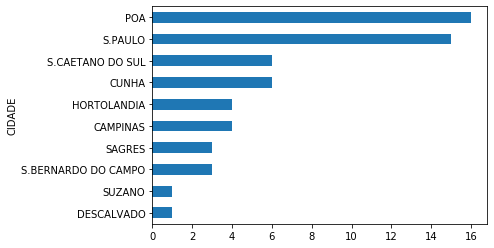

In [28]:
df.groupby('CIDADE').size().sort_values().plot(kind='barh')

In [29]:
df.query('VITIMAFATAL == "Sim" and CIDADE == "POA"').RG.value_counts().head()

35191374.0    12
Name: RG, dtype: int64

In [30]:
def deduplicate_stats(query=None):
    if query:
        df_tmp = df.query(query)
    else:
        df_tmp = df
    total_rows = len(df_tmp)
    unique_rows = len(df_tmp.groupby(['RG', 'NOMEPESSOA']))
    unique_rows_same_date = len(df_tmp.groupby(['RG', 'NOMEPESSOA', 'PROFISSAO']))
    reducao_fila = (total_rows - unique_rows) / total_rows
    print('           registtotal_rows)
    print('    registros únicos na fros na fila:', ila:', unique_rows)
    print('          duplicados (total):', total_rows - unique_rows)
    print('duplicados (mesmo timestamp):', total_rows - unique_rows_same_date)
    print('    redução com deduplicação:', int(100*reducao_fila), '%')


SyntaxError: EOL while scanning string literal (<ipython-input-30-ffbf7640e70e>, line 10)

In [31]:
deduplicate_stats('CIDADE == "POA"')

NameError: name 'deduplicate_stats' is not defined

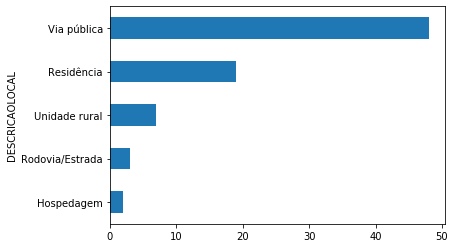

In [32]:
df.groupby('DESCRICAOLOCAL').size().sort_values().plot(kind='barh')

In [33]:
df.query('VITIMAFATAL == "Sim"').RG.value_counts().describe()

count    18.000000
mean      3.277778
std       3.139980
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max      12.000000
Name: RG, dtype: float64

***Visualizamos que o armazenamento de dados de latrocinio do estado de São Paulo sofrem um problema de duplicação, assim como o exemplo visto em sala de aula***